# [NTDS'18] milestone 2: network models
[ntds'18]: https://github.com/mdeff/ntds_2018

[Hermina Petric Maretic](https://people.epfl.ch/hermina.petricmaretic), [EPFL LTS4](https://lts4.epfl.ch)

## Students

* Team: `Team 16`
* Students: `Zhang Yinan, Yu Ting Huang, Xia Shengzhao, Deng Zhantao`
* Dataset: `IMDb Films`

## Rules

* Milestones have to be completed by teams. No collaboration between teams is allowed.
* Textual answers shall be short. Typically one to two sentences.
* Code has to be clean.
* In the first part, you cannot import any other library than we imported. In the second part, you are allowed to import any library you want.
* When submitting, the notebook is executed and the results are stored. I.e., if you open the notebook again it should show numerical results and plots. We won't be able to execute your notebooks.
* The notebook is re-executed from a blank state before submission. That is to be sure it is reproducible. You can click "Kernel" then "Restart & Run All" in Jupyter.

## Objective

The purpose of this milestone is to **explore various random network models**, analyse their properties and **compare them to your network**. In the first part of the milestone you will **implement two random graph models** and **try to fit them to your network**. In this part you are not allowed to use any additional package. In the second part of the milestone you will choose a third random graph model that you think shares some properties with your network. You will be allowed to use additional packages to construct this network, but you must **explain your network choice**. Finally, make your code as clean as possible, and keep your textual answers short.

## Part 0

**For the computation of this part of the milestone you are only allowed to use the packages that have been imported in the cell below.**

In [4]:
import random

import numpy as np
import pandas as pd
import matplotlib.pyplot as plt
import scipy

%matplotlib inline

## Part 1

Import the adjacency matrix of your graph that you constructed in milestone 1, as well as the number of nodes and edges of your network.

In [5]:
adjacency = pd.read_csv('adjacency.csv').iloc[:,1:].astype(int).values
n_nodes =  1201          # the number of nodes in the network
n_edges =  365250        # the number of edges in the network

### Question 1

Create a function that constructs an Erdős–Rényi graph.

In [6]:
def erdos_renyi(n, p, seed=None):
    """Create an instance from the Erdos-Renyi graph model.
    
    Parameters
    ----------
    n: int
        Size of the graph.
    p: float
        Edge probability. A number between 0 and 1.
    seed: int (optional)
        Seed for the random number generator. To get reproducible results.
    
    Returns
    -------
    adjacency
        The adjacency matrix of a graph.
    """
    random.seed(seed)
    adjacency = np.zeros((n,n))
    # link node if the randomly created probability larger than p
    edges = [(i,j) for i in range(n) for j in range(i) if random.random() > p]
    for (i,j) in edges:
        adjacency[i,j] = 1
        adjacency[j,i] = 1
    return adjacency

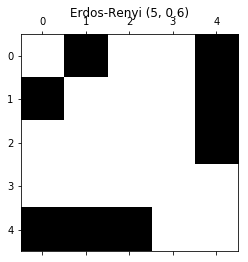

In [7]:
er = erdos_renyi(5, 0.6, 9765)
plt.spy(er)
plt.title('Erdos-Renyi (5, 0.6)')
plt.show()

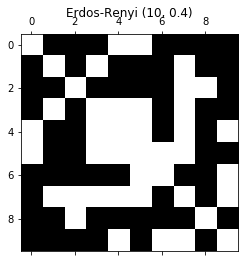

In [8]:
er = erdos_renyi(10, 0.4, 7648)

plt.spy(er)
plt.title('Erdos-Renyi (10, 0.4)')
plt.show()

### Question 2

Use the function to create a random Erdos-Renyi graph. Choose the parameters such that number of nodes is the same as in your graph, and the number of edges similar. You don't need to set the random seed. Comment on your choice of parameters.

# -----    The edge number of the random Erdős–Rényi graph is 353242    ----- #


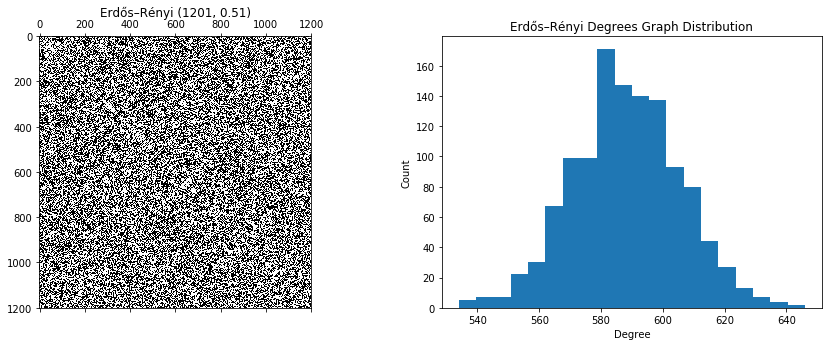

In [9]:
# set parameters
n = 1201
p = 0.51
seed = 7648

# ---------- plot figures ---------- #
plt.figure(figsize=(15,5))
# plot sparsity matrix
plt.subplot(121)
er = erdos_renyi(n, p, seed)
print('# -----    The edge number of the random Erdős–Rényi graph is {edges}    ----- #'.format(edges = int(np.sum(er) / 2)))
plt.spy(er)
plt.title('Erdős–Rényi ({n}, {p})'.format(n=n, p=p))
# plot degree distribution
plt.subplot(122)
node_degree = []
for i in np.arange(er.shape[0]):
    node_degree.append(np.sum(er[i]))
node_degree_pd = pd.DataFrame({'Degree':node_degree, 'Num':np.ones(len(node_degree))})
plt.hist(node_degree_pd['Degree'], bins=20)
plt.xlabel('Degree')
plt.ylabel('Count')
plt.title('Erdős–Rényi Degrees Graph Distribution')

plt.show()

**Answer:**
1. The size of our original data is 4803. After downsampling, the size of data shrinks to ```1201```. We choose node number 1201 as the parameter ```n```.
2. Our adjacency is weighted and when threshold is 0.5, there are ```365250``` edges in our network. We adjust the parameter ```p = 0.51``` to get similar edge number ```353242```.
3. ```n = 1201```, the Distribution of Erdős–Rényi Degrees is close to a Poisson distribution.
4. From the matrix figure, we can see that points are almost uniformly distributed, which is consistent to the property of the Erdős–Rényi network.

### Question 3

Create a function that constructs a Barabási-Albert graph.

In [10]:
def rand_connected_network(n, m0, seed, rand_index, full_bool = False):
    """Choose m nodes from n nodes and create a m * m random connected sub-network with only one component.
    
    Parameters
    ----------
    n: int
        Size of the graph.
    m0: int
        Number of nodes for the inital connected network.
    seed: int
        Seed for the random number generator. To get reproducible results.
    full_bool: Bool
        Whether to creat a fully conected sub-network.
        
    Returns
    -------
    adjacency
        The adjacency matrix of a graph.
    """
    adjacency = np.zeros([n, n], dtype=int)
    # -----    create a m * m random connected sub-network with only one component    ----- #
    if full_bool == False:
        # initialization
        np.random.seed(seed)
        possible_edges = np.random.randint(m0 - 1, (m0 - 1) * m0 / 2 + 1)    # possible edges number for such a network
        full_connect_mat =  np.zeros([n, n], dtype=int)
        upper_triangle_mat = np.zeros([n, n], dtype=int)
        np.random.seed(seed)
        chuffle_m0 = np.random.permutation(rand_index[:m0])     
        # First, randomly connect m0 nodes into a line: link m0 with m0 - 1 edges to ensure no isolated components
        for row, _ in enumerate(chuffle_m0[:-1]):
            adjacency[chuffle_m0[row], chuffle_m0[row + 1]] = 1
            adjacency[chuffle_m0[row + 1], chuffle_m0[row]] = 1
        # if there is only two initial nodes, just link them
        if m0 == 2:
            return adjacency
        else:
            # create a fully connected graph
            for row in rand_index[0:m0]:
                full_connect_mat[row, rand_index[0:m0]] = 1
            # create a upper triangle matrix: 1 in matrix means the edges that could but haven't been picked.
            for i in np.arange(n):
                for j in np.arange(i+1, n):
                    upper_triangle_mat[i, j] = full_connect_mat[i, j] - adjacency[i, j]
            upper_mat_ravel = upper_triangle_mat.ravel()
            upper_index = np.arange(upper_mat_ravel.shape[0])
            upper_index = upper_index[upper_mat_ravel == 1]
            # randomly pick (possible_edges - m0 + 1) nodes to get the target random sub-network
            np.random.seed(seed)
            upper_index = np.random.choice(upper_index, possible_edges - m0 + 1, replace=False) # if upper_index = []
            upper_mat_i, upper_mat_j =  np.unravel_index(upper_index, (n, n))
            for i in np.arange(upper_mat_i.shape[0]):
                adjacency[upper_mat_i[i], upper_mat_j[i]] = 1
                adjacency[upper_mat_j[i], upper_mat_i[i]] = 1
        return adjacency
    else:
        for row in rand_index[0:m0]:
            adjacency[row, rand_index[0:m0]] = 1
        return adjacency

In [11]:
def barabasi_albert(n, m, m0=2, seed=None):
    """Create an instance from the Barabasi-Albert graph model.
    
    Parameters
    ----------
    n: int
        Size of the graph.
    m: int
        Number of edges to attach from a new node to existing nodes.
    m0: int (optional)
        Number of nodes for the inital connected network.
    seed: int (optional)
        Seed for the random number generator. To get reproducible results.
    
    Returns
    -------
    adjacency
        The adjacency matrix of a graph.
    """
    # ----------    initialize    ---------- #
    # m0 parameter in barabasi-albert network has to be m0>=m
    m0 = m if m0 < m else m0
    # create a fully connected m0*m0 sub-network
    np.random.seed(seed)
    rand_index = np.arange(n)
    adjacency = rand_connected_network(n, m0, seed, rand_index, full_bool=False)
    adjacency = adjacency - np.diag(np.diag(adjacency))    # remove diagonal elements
    sum_adjacency = np.sum(adjacency)                      # sum elements in adjacency matrix for efficient caculation
    node_num = m0
    new_node = rand_index[m0:]
    
    # ----------    form barabasi_albert model    ---------- #
    # adding remaining nodes with pereferential attachment
    for new_node_index in new_node:
        # randomly pick a node from old nodes
        P_node = []                                        # a list store probabilities of old nodes 
        old_node = rand_index[0:node_num]
        # calculate probability that the new node connects to old nodes
        for old_node_index in old_node:
            P_node.append(np.sum(adjacency[old_node_index]) / sum_adjacency)
        # use probabilities to choose m points to link edges with new point
        np.random.seed(seed)
        picked_edges = np.random.choice(old_node, m, replace=False, p=P_node)
        adjacency[picked_edges, new_node_index] = 1
        adjacency[new_node_index, picked_edges] = 1
        # update parameters
        sum_adjacency = sum_adjacency + m * 2
        node_num = node_num + 1
    return adjacency

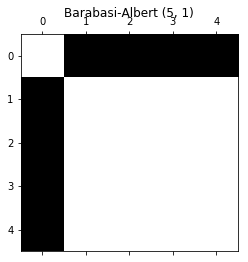

In [12]:
ba = barabasi_albert(5, 1, 2, 9087)
plt.spy(ba)
plt.title('Barabasi-Albert (5, 1)')
plt.show()

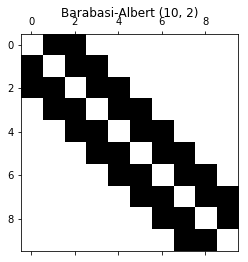

In [14]:
ba = barabasi_albert(10, 2, 3, 8708)
plt.spy(ba)
plt.title('Barabasi-Albert (10, 2)')
plt.show()

### Question 4

Use the function to create a random Barabási-Albert graph. Choose the parameters such that number of nodes is the same as in your graph, and the number of edges similar. You don't need to set the random seed. Comment on your choice of parameters.

# -----    The edge number of the random Barabási-Albert graph is 323192    ----- #


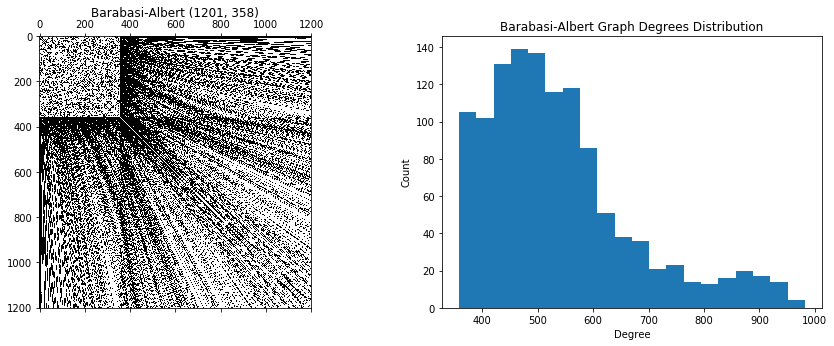

In [16]:
# The size of our original data is 4803. After downsampling, the size of data is 1201.
n = 1201
m = 358
m0 = 359
seed = 73
# ---------- plot figures ---------- #
plt.figure(figsize=(15,5))
# plot sparsity matrix
plt.subplot(121)
ba = barabasi_albert(n, m, m0, seed)
print('# -----    The edge number of the random Barabási-Albert graph is {edges}    ----- #'.format(edges = int(np.sum(ba) / 2)))
plt.spy(ba)
plt.title('Barabasi-Albert ({n}, {m})'.format(n=n, m=m))
# plot degree distribution
plt.subplot(122)
node_degree = []
for i in np.arange(ba.shape[0]):
    node_degree.append(np.sum(ba[i]))
node_degree_pd = pd.DataFrame({'Degree':node_degree, 'Num':np.ones(len(node_degree))})
plt.hist(node_degree_pd['Degree'], bins=20)
plt.xlabel('Degree')
plt.ylabel('Count')
plt.title('Barabasi-Albert Graph Degrees Distribution')

plt.show()

**Answer:**
1. The size of our original data is 4803. After downsampling, the size of data shrinks to ```1201```. We choose node number 1201 as the parameter ```n```.
2. Our adjacency is weighted, when threshold is 0.5 there are ```365250``` edges in our network. We adjust the parameters ```m = 358``` and ```m0 = 359``` to get similar edge number ```323192```.
3. Under the same amount of nodes, the number of edges are signifcantly influenced by the parameter ```m``` while not obviously changed by ```m0```.
4. From the matrix figure and histogram, we can intuitively know that most nodes are accumulated to some hubs, which are obviously the orginial nodes ```m0```.  

### Question 5

Compare the number of edges in all three networks (your real network, the Erdős–Rényi network, and the Barabási-Albert netowk).

1. Our Network contains 353368 edges, ER network contains 360476 edges,  while BA network contains 323192 edges. 
2. When adjusting the parameter, we try to align the edge numbers. We will further explore the similarities among them in the following.

### Question 6

Implement a function that computes the [Kullback–Leibler (KL) divergence](https://en.wikipedia.org/wiki/Kullback%E2%80%93Leibler_divergence) between two probability distributions.
We'll use it to compare the degree distributions of networks.

In [17]:
def kl_divergence(p, q):
    """Compute the KL divergence between probability distributions of degrees of two networks.
    
    Parameters
    ----------
    p: np.array
        Probability distribution of degrees of the 1st graph.
    q: np.array
        Probability distribution of degrees of the 2nd graph.
    
    Returns
    -------
    kl
        The KL divergence between the two distributions.
    """
    kl = p@np.log((p/q).reshape(-1,1))
    return kl

In [19]:
p_test = np.array([0.2, 0.2, 0.2, 0.4])
q_test = np.array([0.3, 0.3, 0.1, 0.3])
kl_divergence(p_test, q_test)

array([0.09151622])

### Question 7: 

Compare the degree distribution of your network to each of the two synthetic ones, in terms of KL divergence.

**Hint:** Make sure you normalise your degree distributions to make them valid probability distributions.

**Hint:** Make sure none of the graphs have disconnected nodes, as KL divergence will not be defined in that case. If that happens with one of the randomly generated networks, you can regenerate it and keep the seed that gives you no disconnected nodes.

In [20]:
# ----------    initialization    ---------- #
adjacency_list = [adjacency, er, ba]

# ----------    calculate  Kullback–Leibler (KL) divergence ---------- #
uniq_list = []
degree_list = []
num_node_list= []
for adj_index in adjacency_list:
    nodes = len(adj_index)
    num_node_list.append(nodes)
    degree = np.sum(adj_index, axis = 1)
    degree = np.sort(degree)
    degree_list.append(degree)
    degree_df = pd.DataFrame({'degree':degree,'node':np.ones(len(degree))})
    uniq_degree_df = degree_df.groupby(['degree']).count()
    uniq_degree_df = uniq_degree_df.reset_index()
    uniq_list.append(uniq_degree_df)
    
merge_degree12 = uniq_list[0].merge(uniq_list[1], how ='outer', left_on='degree', right_on='degree')
merge_degree13 = uniq_list[0].merge(uniq_list[2], how ='outer', left_on='degree', right_on='degree')
# ----- calculate degree distribution of our network to the random Erdos-Renyi graph ----- #
for ct_i in range(merge_degree12.shape[0] - 1):  
    # if ith row contains nan 
    if merge_degree12.iloc[ct_i].isna().sum() > 0:
        if merge_degree12.iloc[ct_i+1].isna().sum() > 0:
            # if i+1th row contains nan
            # sum ith and i+1th rows, keep nan
            merge_degree12.iloc[ct_i+1] = merge_degree12.iloc[ct_i:ct_i + 2].sum(skipna = False)
        else:
            # if i+1th row only contains number
            # sum ith and i+1th rows, skip nan
            merge_degree12.iloc[ct_i+1] = merge_degree12.iloc[ct_i:ct_i + 2].sum(skipna = True)
            
merge_degree12.dropna(inplace=True)

degree11_dist = merge_degree12.node_x / merge_degree12.node_x.sum()
degree12_dist = merge_degree12.node_y / merge_degree12.node_y.sum()
kl_er = kl_divergence(degree11_dist.values, degree12_dist.values)
print('# -----    The KL divergence of our graph and ER graph is {}.    ----- #'
      .format(kl_er[0]))
# ----- calculate degree distribution of our network to the random Barabási-Albert graph ----- #
for ct_i in range(merge_degree13.shape[0] - 1):
    # if ith row contains nan 
    if merge_degree13.iloc[ct_i].isna().sum() > 0:    
        if merge_degree13.iloc[ct_i+1].isna().sum() > 0:
            # if i+1th row contains nan
            # sum ith and i+1th rows, keep nan
            merge_degree13.iloc[ct_i+1] = merge_degree13.iloc[ct_i:ct_i + 2].sum(skipna = False)
        else:
            # if i+1th row only contains number
            # sum ith and i+1th rows, skip nan
            merge_degree13.iloc[ct_i+1] = merge_degree13.iloc[ct_i:ct_i + 2].sum(skipna = True)
            
merge_degree13.dropna(inplace=True)

degree21_dist = merge_degree13.node_x / merge_degree13.node_x.sum()
degree23_dist = merge_degree13.node_y / merge_degree13.node_y.sum()
kl_ba = kl_divergence(degree21_dist.values, degree23_dist.values)
print('# -----    The KL divergence of our graph and BA graph is {}.    ----- #'
      .format(kl_ba[0]))

# -----    The KL divergence of our graph and ER graph is 3.1287845784572177.    ----- #
# -----    The KL divergence of our graph and BA graph is 1.148544046918072.    ----- #


### Question 8

Plot the degree distribution historgrams for all three networks. Are they consistent with the KL divergence results? Explain.

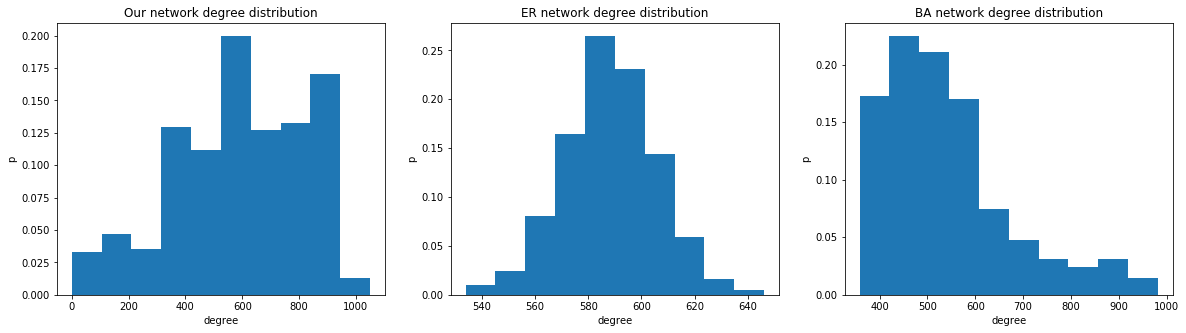

In [21]:
plt.figure(figsize=(20,5))
# ----------  plot our network    ---------- #
plt.subplot(131)
weights = np.ones_like(degree_list[0]) / float(num_node_list[0])
plt.hist(degree_list[0], weights=weights)
plt.title("Our network degree distribution")
plt.xlabel("degree")
plt.ylabel("p")
# ----------  plot ER network    ---------- #
plt.subplot(132)
weights = np.ones_like(degree_list[1]) / float(num_node_list[1])
plt.hist(degree_list[1], weights=weights)
plt.title("ER network degree distribution")
plt.xlabel("degree")
plt.ylabel("p")
# ----------  plot BA network    ---------- #
plt.subplot(133)
weights = np.ones_like(degree_list[2]) / float(num_node_list[2])
plt.hist(degree_list[2], weights=weights)
plt.title("BA network degree distribution")
plt.xlabel("degree")
plt.ylabel("p")
plt.show()

**Answer：**
1. Refering to the shape of histograms, ER network is more similar to our network. 
2. However, it contradicts to the result given by calculating KL divergence. It is because the degree distribution of ER network is much denser and concentrates on the mean value.

### Question 9

Imagine you got equal degree distributions. Would that guarantee you got the same graph? Explain.

**Answer:**
1. No. Because every node is unique and denotes different meanings. Although we have the number of nodes and degree distribution, we don't know the exact connections between nodes, i.e. we can not reconstruct the graph.
2. If we only knows the number of nodes and the degree distribution, but do not know which node connects to which one, we are not able to construct the graph.

## Part 2

**You are allowed to use any additional library here (e.g., NetworkX, PyGSP, etc.).** Be careful not to include something here and use it in part 1!

In [22]:
import networkx as nx

### Question 10

Choose a random network model that fits you network well. Explain your choice. 

**Hint:** Check lecture notes for different network models and their properties. Your choice should be made based on at least one property you'd expect to be similar.

**Answer:**
1. Among models mentioned during the class, Erdős-Rényi (ER) model fits our network better, as graphs generated from ER model have similar edge numbers and density with our graph. 
2. In addition, the degree distributions of ER model and our graph are pretty similar. However, the range of the distribution is different, which is the reason that the KL divergence value between ER model and our graph is large.

### Question 11

Explain (in short) how the chosen model works.

**Answer:**
1. Generating N (input) isolated nodes.
2. Creating an edge between any two nodes according to the probability P (input)

### Question 12

Create a random graph from that model, such that the number of nodes is the same as in your graph.

In [24]:
# We use Erdős-Rényi model to create the graph
probs = 0.5
ER_randGraph     = nx.erdos_renyi_graph(n_nodes, probs)
density          = nx.density(ER_randGraph)
num_edge         = nx.number_of_edges(ER_randGraph)
diameter         = nx.diameter(ER_randGraph)
degree_dist      = sorted(d for n, d in ER_randGraph.degree())
avg_clustercoeff = nx.average_clustering(ER_randGraph)

print('# ---------- Parameters of the network ---------- #')
print('Edges                    :', num_edge)
print('Density                  :', density)
print('Diameter                 :', diameter)
print('# ---------- End of display parameters ---------- #')

# ---------- Parameters of the network ---------- #
Edges                    : 359796
Density                  : 0.49930058284762696
Diameter                 : 2
# ---------- End of display parameters ---------- #


### Question 13

Check the properties you expected to be similar, and compare to your network.

Are the results what you expected? Explain.

**Answer**
1. As shown above, properties we chosen are the ```number of edges```, the graph ```density``` and the graph ```diameter```. All the three parameters are similar to our model, which fullfill our expectations. 
2. The generated graph has ```359,796``` edges, which is very close to our graph ( ```365,250``` edges ).
3. The sparsity/density of the generated graph is ```0.499```, which is similar to the sparsity of our graph (```0.51```).
4. In addition to sparsity and the number of edges, both the generated graph and our graph have a diameter of ```2```. 